In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string # for text manipulation 
import warnings 
import numpy as np 
import pandas as pandas # for data manipulation 
import matplotlib.pyplot as plt


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import svm

In [3]:
## Checking out the data set for training the model ##

df = pandas.read_csv('E:/Project 5 credits/Final Project/final_dataset.csv', encoding = "ISO-8859-1", header=None,low_memory=False)
df.head()

 # As the data has no column titles, we will add our own
df.columns = ["id", "previousindex", "label","tweet"]

df.head()

,id,previousindex,label,tweet
0,1,0.0,0,I'm exhausted from using so many Megan Thee St...
1,2,1.0,0,ranbooâ??s arg is gonna be less heavy / anxi...
2,3,2.0,0,"@ZiaMcCorgi555 Wandavision : ""Clinically depr..."
3,4,3.0,0,@ellamAYNiaa @BigDaddySamurai @shaurya__kumar ...
4,5,4.0,0,"Athe than , no time for depression all peh pun..."


In [4]:
df.columns[df.isnull().any()].tolist()

['previousindex']

In [5]:
del df["previousindex"]
df.isnull().any().any()

False

In [6]:
df.info(null_counts=True)

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  """Entry point for launching an IPython kernel.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200001 entries, 0 to 200000
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   id      200001 non-null  int64 
 1   label   200001 non-null  object
 2   tweet   200001 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.6+ MB


In [7]:
print(df)

            id label                                              tweet
0            1     0  I'm exhausted from using so many Megan Thee St...
1            2     0  ranbooâ??s arg is gonna be   less heavy / anxi...
2            3     0  @ZiaMcCorgi555 Wandavision :  "Clinically depr...
3            4     0  @ellamAYNiaa @BigDaddySamurai @shaurya__kumar ...
4            5     0  Athe than , no time for depression all peh pun...
...        ...   ...                                                ...
199996  199997     1  @Noufah i have tickets worth about 70 KD - abo...
199997  199998     1                 #Hoppusday so amazing!  brilliant!
199998  199999     1                   @Ramkarthik u just made that up 
199999  200000     1     @KChenoweth Cool! My cousin Kacie is in Hair. 
200000  200001     1  still hasnt slept....but has been have an inte...

[200001 rows x 3 columns]


In [8]:
df.dtypes
df.drop(100000, inplace=True)

In [9]:
df['label'] = pandas.to_numeric(df['label'])

In [10]:
df.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [17]:
stopwords=nltk.corpus.stopwords.words('english')

In [18]:
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text

In [19]:
from nltk.stem.porter import PorterStemmer
def cleanup_tweets(tweet_df):
    # remove handle
    df['clean_tweet'] = df['tweet'].str.replace("@", "") 
    # remove links
    df['clean_tweet'] = df['clean_tweet'].str.replace(r"http\S+", "") 
    # remove punctuations and special characters
    df['clean_tweet'] = df['clean_tweet'].str.replace("[^a-zA-Z]", " ") 
    # remove stop words
    df['clean_tweet'] = df['clean_tweet'].apply(lambda text : remove_stopwords(text.lower()))
    # split text and tokenize
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: x.split())
    # let's apply stemmer
    stemmer = PorterStemmer()
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: [stemmer.stem(i) for i in x])
    # stitch back words
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x]))
    # remove small words
    df['clean_tweet'] = df['clean_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [20]:
cleanup_tweets(df)

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  
c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [23]:
# function to display word clous
from wordcloud import WordCloud,STOPWORDS
def createWrdCloudForSentiment(target):
    temp_df = pandas.DataFrame() 
    if target == -1:
        temp_df = df
    else:
        temp_df = df[df.label==target]
    words = " ".join(temp_df.clean_tweet)
    wrdcld = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=1500,
                      height=1000).generate(words)
    plt.figure(figsize=(10,10))
    plt.imshow(wrdcld)
    plt.axis('off')
    plt.show

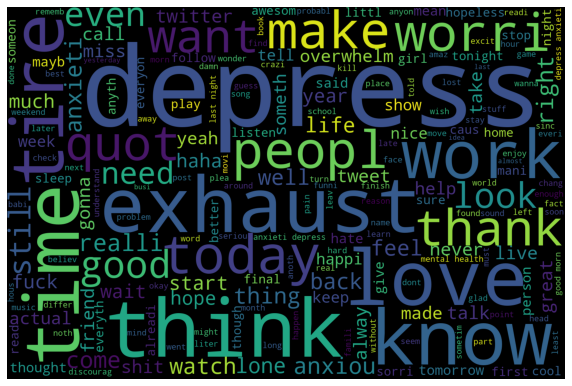

In [24]:
createWrdCloudForSentiment(-1)

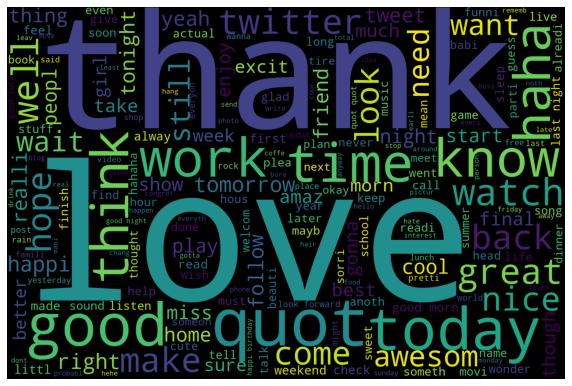

In [25]:
# tweets for positive sentiment
createWrdCloudForSentiment(1) 

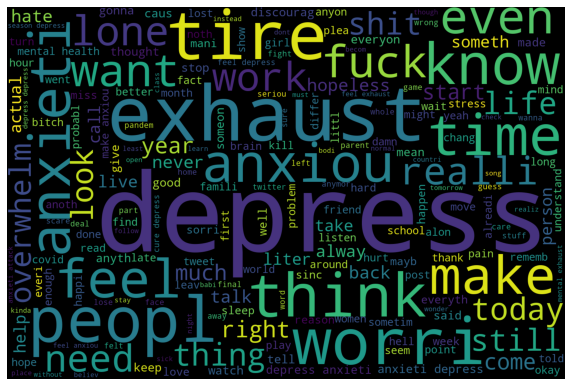

In [26]:
# tweets for positive sentiment
createWrdCloudForSentiment(0) 

In [27]:
# Data balance
def createPieChartFor(t_df):
    Lst = 100*t_df.value_counts()/len(t_df)
    
    # set data for pie chart
    labels = t_df.value_counts().index.values
    sizes =  Lst 
    
    # set labels
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

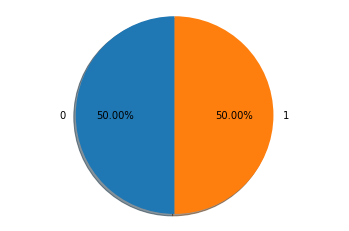

In [28]:
createPieChartFor(df.label)

In [29]:
#As words are in the order of csv files we imported , we have to shuffle the rows & Reindex

df = df.sample(frac=1).reset_index(drop=True)
df.head()

,id,label,tweet,clean_tweet
0,73632,0,At least Iâ??m not depressed anymore ð???ð???,least depress anymor
1,91484,0,Hospitals are still overwhelmed with high #'s ...,hospit still overwhelm high patient health wor...
2,103043,1,Awww javie and mr rosales are bondding,awww javi rosal bond
3,172890,1,You're welcome Katie. You don't thank someone ...,welcom kati thank someon someth want want burg...
4,176789,1,Feeling miserable with a bad cold... having a ...,feel miser cold citi marathon women realli rig...


In [30]:
#X_train,X_test,y_train,y_test = train_test_split(tweet_df , test_size=.2,  random_state=42)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

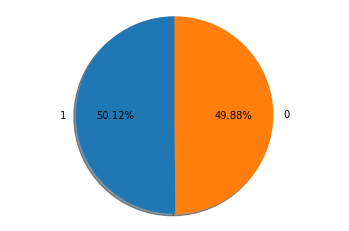

In [32]:
createPieChartFor(train_df.label)

In [33]:
train_tweets =[]
for tweet in train_df.clean_tweet:
    train_tweets.append(tweet)
    
test_tweets =[]
for tweet in test_df.clean_tweet:
    test_tweets.append(tweet)

In [34]:
train_tweets[:10]

['stress anxieti increas blood pressur caus blood clot perhap focu ensur peopl feel relax scare especi mani shield trip anymor',
 'poppiestar nice juxtaposit tweet',
 'adhd adhd parent struggl adhder utter commun void ensu frustrat lead acut depress feel isol insecur strong children adhdaut adhdtwitt neurodivers',
 'mushaimadeel depress',
 'make even hopeless depress song',
 'anitabora borrow cycl infi particip',
 'sunbathin margat beach',
 'yvonni starsmitten commun worri streamer viewer give cooki',
 'social anxieti like',
 'follow friday follow follow back like dyslex tgif nation doughnut termina']

In [35]:
# bag of words model
vectorizer = TfidfVectorizer()
train_tfidf_model = vectorizer.fit_transform(train_tweets)
test_tfidf_model = vectorizer.transform(test_tweets)

In [38]:

'''
# let's look at the dataframe
train_tfidf = pandas.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())
train_tfidf.head()
'''

"\n# let's look at the dataframe\ntrain_tfidf = pandas.DataFrame(train_tfidf_model.toarray(), columns=vectorizer.get_feature_names())\ntrain_tfidf.head()\n"

In [39]:
cls = [LogisticRegression(),
       MultinomialNB(), 
       DecisionTreeClassifier(),
       RandomForestClassifier(n_estimators=1000, random_state=42),
       KNeighborsClassifier(n_neighbors = 5),
       XGBClassifier(max_depth=6, n_estimators=1000, nthread= 3),
       svm.SVC()]

cls_name = []

In [41]:
lbl_actual = test_df.label
i = 0
accuracy = []
for cl in cls:
    model = cl.fit(train_tfidf_model,train_df.label)
    lbl_pred = model.predict(test_tfidf_model)
    a = (100*accuracy_score(lbl_pred, lbl_actual))
    a = round(a,2)
    accuracy.append(a)
    cls_name.append(cl.__class__.__name__)
    print ("{}  Accuracy Score : {}%".format(cls_name[i],a))
    print ( classification_report(lbl_pred, lbl_actual))
    i +=1

c:\users\nimes\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression  Accuracy Score : 94.68%
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     19122
           1       0.97      0.92      0.95     20878

    accuracy                           0.95     40000
   macro avg       0.95      0.95      0.95     40000
weighted avg       0.95      0.95      0.95     40000

MultinomialNB  Accuracy Score : 90.55%
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     22107
           1       0.86      0.95      0.90     17893

    accuracy                           0.91     40000
   macro avg       0.91      0.91      0.91     40000
weighted avg       0.91      0.91      0.91     40000

DecisionTreeClassifier  Accuracy Score : 91.51%
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     20801
           1       0.90      0.93      0.91     19199

    accuracy                           0.92     400

KeyboardInterrupt: 

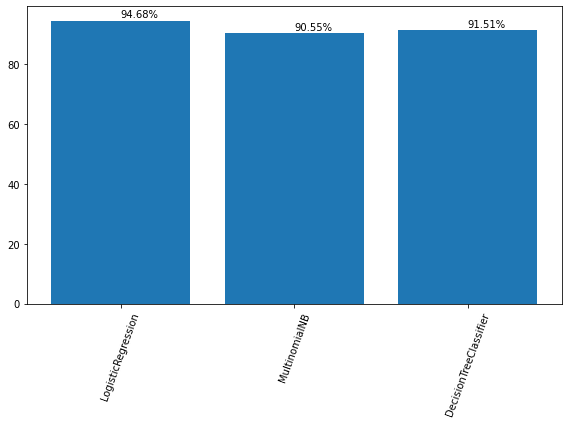

In [42]:
plt.figure(figsize=(8,6))
plt.bar(cls_name, accuracy)
plt.xticks(rotation=70)
for index,data in enumerate(accuracy):
    plt.text(x=index , y =data+1 , s=f"{data}%" , fontdict=dict(fontsize=10))
plt.tight_layout()
plt.show()